In [224]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import learning_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_wine

%matplotlib inline

In [280]:
#plot learning curve function from scikit learn tutorial

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 0.9, 5)):
    """
    Generate a simple plot of the test and training learning curve.
    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.
    title : string
        Title for the chart.
    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.
    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.
    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.
    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.
        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.
        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.
    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    print(train_scores_mean)
    print(test_scores_mean)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [432]:
#####load Breast Cancer Dataset
data = load_breast_cancer(as_frame = True)
X = data.data
Y = data.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.25)
features = list(X_train.columns.values)

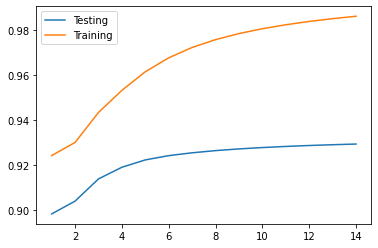

In [272]:
#Decision Tree classifier
#decision tree learning curve of tree depth 7
list1=[]
list2=[]
accuracy = []
acc_train = []
for j in range(1,15):
    for i in range(1,100):
        clf = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=j)

        X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=i, test_size=0.25)
        clf = clf.fit(X_train, y_train)
        train_predict = clf.predict(X_train)
        test_predict = clf.predict(X_test)
        list1.append(accuracy_score(y_train, train_predict))
        list2.append(accuracy_score(y_test, test_predict))
    accuracy.append(np.mean(list2))
    acc_train.append(np.mean(list1))
plt.plot(range(1,15),accuracy, label="Testing")
plt.plot(range(1,15),acc_train, label="Training")
plt.legend(loc="best")
plt.show()

[1.         0.95       0.94977974 0.92955975 0.93300733]
[0.81723335 0.90506133 0.9209129  0.90861667 0.91207887]


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/pyplot.py'>

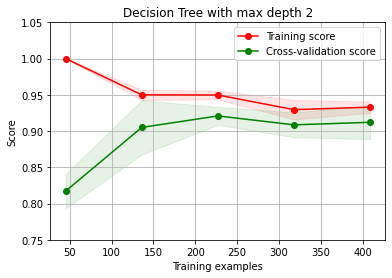

In [288]:
clf = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=2)
plot_learning_curve(clf, "Decision Tree with max depth 2", X, Y, ylim=[0.75,1.05])

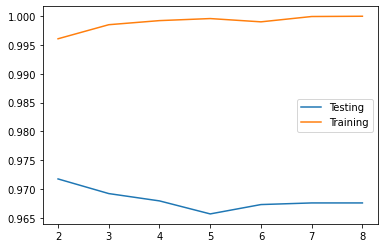

In [443]:
#Neural network classifier learning curve
X_norm = (X-X.mean(axis=0))/X.std(axis=0)
accuracy = []
acc_train = []
for j in range(2,9):
    list1=[]
    list2=[]
    for i in range(1,100):
        clf = MLPClassifier(solver='lbfgs', alpha=1e-3, hidden_layer_sizes=(j), random_state=0, activation='logistic')

        X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, random_state=i, test_size=0.25)
        clf.fit(X_train, y_train)
        train_predict = clf.predict(X_train)
        test_predict = clf.predict(X_test)
        list1.append(accuracy_score(y_train, train_predict))
        list2.append(accuracy_score(y_test, test_predict))
    accuracy.append(np.mean(list2))
    acc_train.append(np.mean(list1))
plt.plot(range(2,9),accuracy, label="Testing")
plt.plot(range(2,9),acc_train, label="Training")
plt.legend(loc="best")
plt.show()

[1.         1.         0.99911894 0.99685535 0.99755501]
[0.85582984 0.93850334 0.94378202 0.95786369 0.96485018]


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/pyplot.py'>

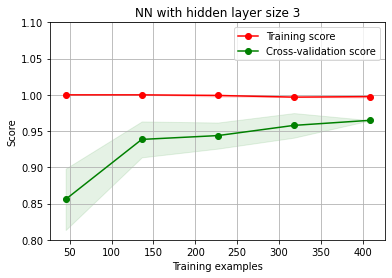

In [454]:
#Neural network classifier learning curve
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3), random_state=0, activation='logistic')
plot_learning_curve(clf, "NN with hidden layer size 3", X_norm, Y, ylim=[0.8,1.1])

[0.91111111 0.57647059 0.5215859  0.57044025 0.60293399]
[0.3725819  0.4217047  0.42521348 0.6274181  0.6274181 ]


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/pyplot.py'>

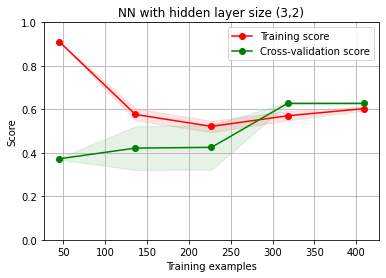

In [455]:
#Neural network classifier learning curve
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3,2), random_state=0, activation='logistic')
plot_learning_curve(clf, "NN with hidden layer size (3,2)", X, Y, ylim=[0,1])

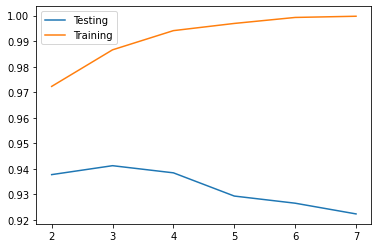

In [297]:
#Boosted DT classifier
accuracy = []
acc_train = []
for j in range(2,8):
    list1=[]
    list2=[]
    for i in range(10):
        clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.001, max_depth=j, random_state=i)
        X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=i, test_size=0.25)
        clf.fit(X_train, y_train)
        train_predict = clf.predict(X_train)
        test_predict = clf.predict(X_test)
        list1.append(accuracy_score(y_train, train_predict))
        list2.append(accuracy_score(y_test, test_predict))
    accuracy.append(np.mean(list2))
    acc_train.append(np.mean(list1))
plt.plot(range(2,8),accuracy, label="Testing")
plt.plot(range(2,8),acc_train, label="Training")
plt.legend(loc="best")
plt.show()

[1.         0.99411765 0.99118943 0.99056604 0.98973105]
[0.56756715 0.90153703 0.90329141 0.93496351 0.95084614]


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/pyplot.py'>

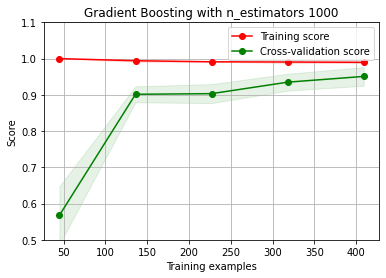

In [294]:
clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.001, max_depth=3, random_state=0)
plot_learning_curve(clf, "Gradient Boosting with n_estimators 1000", X, Y, ylim=[0.5,1.1])

In [126]:
#SVM classifier
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=0.25)
for kernel in ('linear', 'rbf'):
    clf = svm.SVC(kernel=kernel, gamma=2)
    clf = clf.fit(X_train, y_train)
    test_predict = clf.predict(X_test)
    print(accuracy_score(y_test, test_predict))

0.958041958041958
0.6293706293706294


In [298]:
#Choose linear as the preferred kernel function
clf = svm.SVC(kernel="linear", gamma=0.0001)

[1.         0.97647059 0.97268722 0.96666667 0.96821516]
[0.85752212 0.93322465 0.93844124 0.95430834 0.95432386]


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/pyplot.py'>

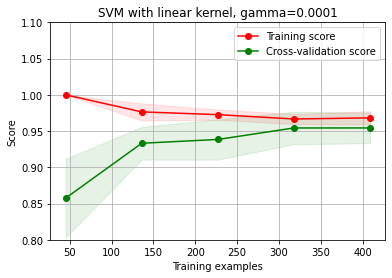

In [299]:
#SVM learning curve with linear kernel
plot_learning_curve(clf, "SVM with linear kernel, gamma=0.0001", X, Y, ylim=[0.8,1.1])

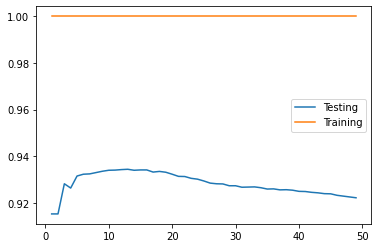

In [302]:
#KNN classifier
accuracy = []
acc_train = []
for K in range(1,50):
    list1=[]
    list2=[]
    clf = KNeighborsClassifier(K, weights="distance")
    for i in range(1,100):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=i, test_size=0.25)
        clf = clf.fit(X_train, y_train)    
        test_predict = clf.predict(X_test)
        train_predict = clf.predict(X_train)
        list1.append(accuracy_score(y_train, train_predict))
        list2.append(accuracy_score(y_test, test_predict))
    accuracy.append(np.mean(list2))
    acc_train.append(np.mean(list1))
plt.plot(range(1,50),accuracy, label="Testing")
plt.plot(range(1,50),acc_train, label="Training")
plt.legend(loc="best")
plt.show()


[1. 1. 1. 1. 1.]
[0.44288154 0.90330694 0.92266729 0.9279615  0.93322465]


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/pyplot.py'>

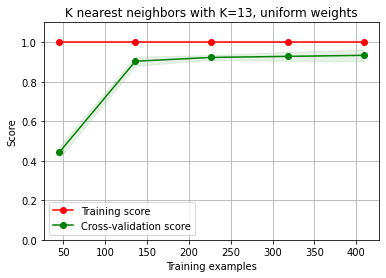

In [303]:
#learning curve of KNN classifier with K=13
clf = KNeighborsClassifier(13, weights="distance")
plot_learning_curve(clf, "K nearest neighbors with K=13, uniform weights", X, Y, ylim=[0,1.1])

In [456]:
###############################################
#####load wine Dataset
data = load_wine(as_frame = True)
X = data.data
Y = data.target
X['Quality'] = Y
X = X.sample(frac=1)

In [457]:
Y = X['Quality']
X = X.drop(columns=['Quality'])

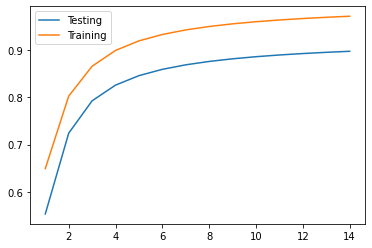

In [357]:
#Decision Tree classifier
#decision tree learning curve of tree depth 4
list1=[]
list2=[]
accuracy = []
acc_train = []
for j in range(1,15):
    for i in range(1,100):
        clf = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=j)

        X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=i, test_size=0.25)
        clf = clf.fit(X_train, y_train)
        train_predict = clf.predict(X_train)
        test_predict = clf.predict(X_test)
        list1.append(accuracy_score(y_train, train_predict))
        list2.append(accuracy_score(y_test, test_predict))
    accuracy.append(np.mean(list2))
    acc_train.append(np.mean(list1))
plt.plot(range(1,15),accuracy, label="Testing")
plt.plot(range(1,15),acc_train, label="Training")
plt.legend(loc="best")
plt.show()

[1. 1. 1. 1. 1.]
[0.78063492 0.88206349 0.91031746 0.89873016 0.89920635]


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/pyplot.py'>

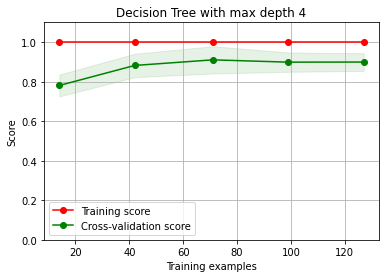

In [366]:
clf = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=4)
plot_learning_curve(clf, "Decision Tree with max depth 4", X, Y, ylim=[0,1.1])

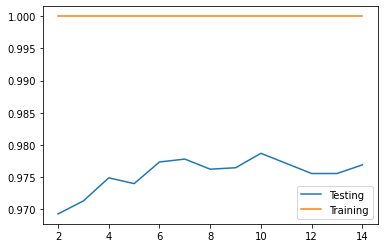

In [427]:
#Neural network classifier learning curve
X_norm = (X-X.mean(axis=0))/X.std(axis=0)
accuracy = []
acc_train = []
for j in range(2,15):
    list1=[]
    list2=[]
    for i in range(1,100):
        clf = MLPClassifier(solver='lbfgs', alpha=1e-3, hidden_layer_sizes=(j), random_state=0, activation='logistic')
        X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, random_state=i, test_size=0.25)
        clf.fit(X_train, y_train)
        train_predict = clf.predict(X_train)
        test_predict = clf.predict(X_test)
        list1.append(accuracy_score(y_train, train_predict))
        list2.append(accuracy_score(y_test, test_predict))
    accuracy.append(np.mean(list2))
    acc_train.append(np.mean(list1))
plt.plot(range(2,15),accuracy, label="Testing")
plt.plot(range(2,15),acc_train, label="Training")
plt.legend(loc="best")
plt.show()

[1. 1. 1. 1. 1.]
[0.89269841 0.95492063 0.96634921 0.96079365 0.97746032]


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/pyplot.py'>

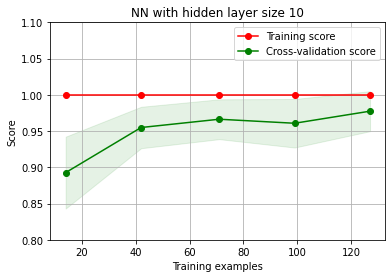

In [462]:
#Neural network classifier learning curve
X_norm = (X-X.mean(axis=0))/X.std(axis=0)
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10), random_state=0, activation='logistic')
plot_learning_curve(clf, "NN with hidden layer size 10", X_norm, Y, ylim=[0.8,1.1])

[1.         1.         0.98309859 0.98585859 0.9511811 ]
[0.85920635 0.94396825 0.84714286 0.91507937 0.90349206]


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/pyplot.py'>

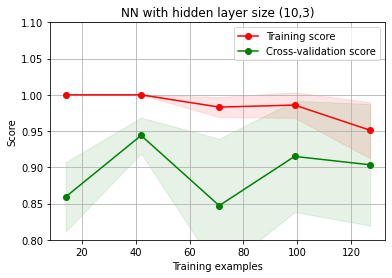

In [463]:
#Neural network classifier learning curve
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,3), random_state=0, activation='logistic')
plot_learning_curve(clf, "NN with hidden layer size (10,3)", X_norm, Y, ylim=[0.8,1.1])

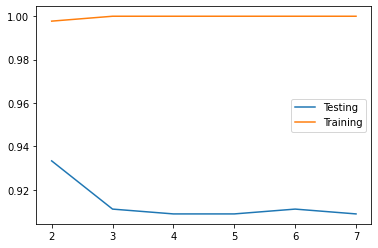

In [372]:
#Boosted DT classifier
accuracy = []
acc_train = []
for j in range(2,8):
    list1=[]
    list2=[]
    for i in range(10):
        clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.001, max_depth=j, random_state=i)
        X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=i, test_size=0.25)
        clf.fit(X_train, y_train)
        train_predict = clf.predict(X_train)
        test_predict = clf.predict(X_test)
        list1.append(accuracy_score(y_train, train_predict))
        list2.append(accuracy_score(y_test, test_predict))
    accuracy.append(np.mean(list2))
    acc_train.append(np.mean(list1))
plt.plot(range(2,8),accuracy, label="Testing")
plt.plot(range(2,8),acc_train, label="Training")
plt.legend(loc="best")
plt.show()

[1.         1.         1.         1.         0.99370079]
[0.74095238 0.85428571 0.87698413 0.91031746 0.93809524]


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/pyplot.py'>

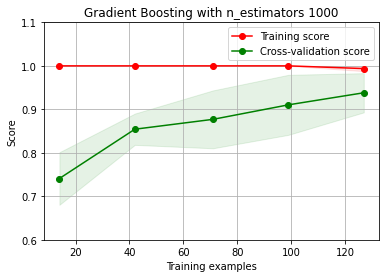

In [465]:
clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.001, max_depth=2, random_state=3)
plot_learning_curve(clf, "Gradient Boosting with n_estimators 1000", X, Y, ylim=[0.6,1.1])

[1.         1.         0.9971831  0.9979798  0.99370079]
[0.76920635 0.92142857 0.94936508 0.96619048 0.96079365]


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/pyplot.py'>

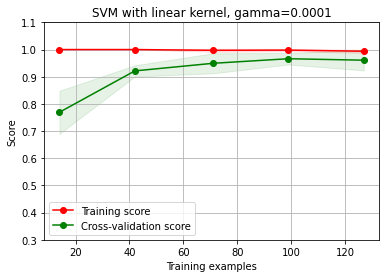

In [399]:
#SVM learning curve with linear kernel
clf = svm.SVC(kernel="linear", gamma=0.0001)
plot_learning_curve(clf, "SVM with linear kernel, gamma=0.0001", X, Y, ylim=[0.3,1.1])

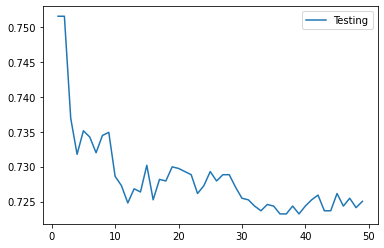

In [400]:
#KNN classifier
accuracy = []
for K in range(1,50):
    #list1=[]
    list2=[]
    clf = KNeighborsClassifier(K, weights="distance")
    for i in range(1,100):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=i, test_size=0.25)
        clf = clf.fit(X_train, y_train)    
        test_predict = clf.predict(X_test)
        #list1.append(accuracy_score(y_train, train_predict))
        list2.append(accuracy_score(y_test, test_predict))
    accuracy.append(np.mean(list2))
#plt.plot(range(len(list1)),list1, label = "Training")
plt.plot(range(1,50),accuracy, label = "Testing")
plt.legend(loc="best")
plt.show()

[1. 1. 1. 1. 1.]
[0.55063492 0.62952381 0.65253968 0.70269841 0.70777778]


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/pyplot.py'>

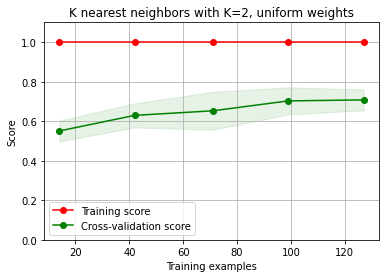

In [467]:
#learning curve of KNN classifier with K=2
clf = KNeighborsClassifier(2, weights="distance")
plot_learning_curve(clf, "K nearest neighbors with K=2, uniform weights", X, Y, ylim=[0,1.1])